In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('daily_close.csv').dropna(how='any')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index, utc=True)
df = df[df['Close'] != 0]

In [3]:
data = pd.read_csv('../data/tech.csv').dropna(how = 'any', axis = 0)
data = data.sort_values(by='Market Cap', ascending=False).reset_index()
symbols = data['Symbol']
len(symbols)

519

In [4]:
annual_returns_list = []
no_data_stocks = []
for i, ticker in enumerate(symbols):
    try:
        print(f'calculating annual returns of {ticker} stock {i}/{len(symbols)}')
        annual_returns_ticker = df[df['ticker'] == ticker]
        annual_returns = annual_returns_ticker['Close'].resample('A')
        annual_returns_df = pd.DataFrame((annual_returns.last()-annual_returns.first())/annual_returns.last())
        annual_returns_df['ticker'] = ticker
        annual_returns_list.append(annual_returns_df)
    except:
        print(f'ticker {ticker} not found')
        no_data_stocks.append(ticker)

calculating annual returns of AAPL stock 0/519
calculating annual returns of MSFT stock 1/519
calculating annual returns of GOOG stock 2/519
calculating annual returns of GOOGL stock 3/519
calculating annual returns of NVDA stock 4/519
calculating annual returns of META stock 5/519
calculating annual returns of TSM stock 6/519
calculating annual returns of AVGO stock 7/519
calculating annual returns of ORCL stock 8/519
calculating annual returns of ASML stock 9/519
calculating annual returns of ADBE stock 10/519
calculating annual returns of CRM stock 11/519
calculating annual returns of INTU stock 12/519
calculating annual returns of QCOM stock 13/519
calculating annual returns of NOW stock 14/519
calculating annual returns of AMAT stock 15/519
calculating annual returns of VRTX stock 16/519
calculating annual returns of LRCX stock 17/519
calculating annual returns of KLAC stock 18/519
calculating annual returns of SNPS stock 19/519
calculating annual returns of SNOW stock 20/519
calc

In [15]:
annual_returns = pd.concat(annual_returns_list)
# annual_returns.to_csv('annual_returns.csv')
df

,Close,ticker
Date,,
1994-01-10 05:00:00+00:00,0.248125,AAPL
1994-01-11 05:00:00+00:00,0.235212,AAPL
1994-01-12 05:00:00+00:00,0.225065,AAPL
1994-01-13 05:00:00+00:00,0.225988,AAPL
1994-01-14 05:00:00+00:00,0.228755,AAPL
...,...,...
2024-01-03 05:00:00+00:00,10.840000,WAVS
2024-01-04 05:00:00+00:00,10.860000,WAVS
2024-01-05 05:00:00+00:00,10.890000,WAVS


### sum annual returns

In [35]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.year

In [38]:
pd.reset_option('display.max_rows')
df.groupby(['Date','ticker'])['Close'].sum().reset_index()


,Date,ticker,Close
0,1994,AAPL,62.664852
1,1994,ADBE,899.611626
2,1994,ALOT,961.257257
3,1994,AMAT,521.516714
4,1994,ASGN,789.968750
...,...,...,...
5971,2024,ZETA,58.230000
5972,2024,ZI,117.360001
5973,2024,ZM,474.555000
5974,2024,ZS,1512.589996


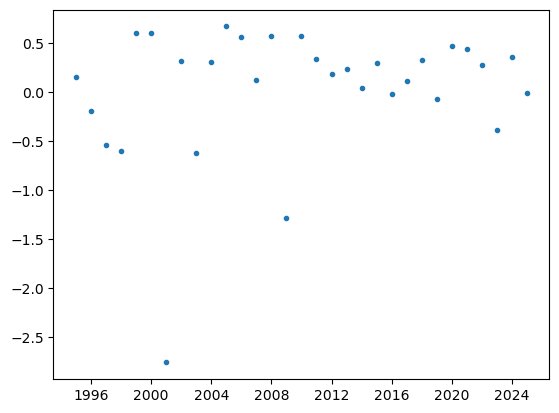

In [31]:
df = df[df['ticker'] == 'AAPL']
annual_returns = df['Close'].resample('A')
plt.plot((annual_returns.last()-annual_returns.first())/annual_returns.last(), '.')

In [ ]:
annual_returns.asfreq()

Date
1994-12-31 00:00:00-05:00           NaN
1995-12-31 00:00:00-05:00           NaN
1996-12-31 00:00:00-05:00      6.403062
1997-12-31 00:00:00-05:00     10.016294
1998-12-31 00:00:00-05:00     21.495306
1999-12-31 00:00:00-05:00     36.190376
2000-12-31 00:00:00-05:00           NaN
2001-12-31 00:00:00-05:00     20.536299
2002-12-31 00:00:00-05:00     16.026058
2003-12-31 00:00:00-05:00     17.118469
2004-12-31 00:00:00-05:00     18.681070
2005-12-31 00:00:00-05:00           NaN
2006-12-31 00:00:00-05:00           NaN
2007-12-31 00:00:00-05:00     25.905088
2008-12-31 00:00:00-05:00     14.406952
2009-12-31 00:00:00-05:00     23.118437
2010-12-31 00:00:00-05:00     21.610043
2011-12-31 00:00:00-05:00           NaN
2012-12-31 00:00:00-05:00     21.830753
2013-12-31 00:00:00-05:00     31.501337
2014-12-31 00:00:00-05:00     40.184559
2015-12-31 00:00:00-05:00     49.303169
2016-12-31 00:00:00-05:00           NaN
2017-12-31 00:00:00-05:00           NaN
2018-12-31 00:00:00-05:00     96.45